# 금융 CSS 개발

이해원

In [64]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 

plt.rcParams['font.family'] ='D2Coding'

In [65]:
train_df = pd.read_csv('C:/Users/LOVE/Downloads/vscode/CSS/train.csv')
test_df = pd.read_csv('C:/Users/LOVE/Downloads/vscode/CSS/test.csv')

train_df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


## 1. 기존 내용

전처리 내역 & 함수 목록
- get_loan_month: 대출기간 전처리
- get_work_year: 근로기간 전처리
- ID 컬럼 drop
- 부채_대비_소득_비율 9999 drop

feature 추가 내역
- get_plus_col
- get_home

2차 EDA 후 처리
- log_normalize: 추가한 컬럼 로그 정규화

In [66]:
# 대출기간 전처리
def get_loan_month(mt):
    return int(mt.strip().replace('months', ''))

train_df['대출기간'] = train_df['대출기간'].apply(get_loan_month)


# 근로기간 전처리
def get_work_year(yr):
    if yr in ['<1 year', '< 1 year']:
        return 0
    elif yr in ['1 year', '1 years']:
        return 1
    elif yr in ['10+ years', '10+years']:
        return 10
    # 'Unknown'은 NaN으로 대체
    elif yr == 'Unknown':
        return np.nan
    # 그 외는 숫자만 추출
    else:
        return int(''.join(filter(str.isdigit, yr)))

train_df['근로기간'] = train_df['근로기간'].apply(get_work_year)

In [67]:
# ID 컬럼 drop
train_df = train_df.drop('ID', axis = 1)

In [68]:
# 부채_대비_소득_비율 전처리
train_df = train_df.drop(train_df[train_df['부채_대비_소득_비율']==9999].index)

In [69]:
def get_plus_col(df):
    df['상환부담율'] = df['총상환이자'] / df['대출금액'] * 100
    df['상환율'] = df['총상환원금'] / df['대출금액'] * 100

get_plus_col(train_df)
train_df.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,상환부담율,상환율
0,12480000,36,6.0,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,0.000000,0.000000
1,14400000,60,10.0,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,1.625417,2.594250
2,12000000,36,5.0,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,1.266200,7.738700
3,14400000,36,8.0,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,1.063250,2.262667
4,18000000,60,NaN,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,0.827533,1.269667


In [70]:
# 로그 정규화
def log_normalize(data):
    return np.log(data + 1)  # 0이거나 음수인 경우를 방지하기 위해 1을 더해줍니다.

# 상환부담율과 상환율을 로그 정규화
train_df['로그_상환부담율'] = log_normalize(train_df['상환부담율'])
train_df['로그_상환율'] = log_normalize(train_df['상환율'])

train_df.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,상환부담율,상환율,로그_상환부담율,로그_상환율
0,12480000,36,6.0,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,0.000000,0.000000,0.000000,0.000000
1,14400000,60,10.0,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,1.625417,2.594250,0.965240,1.279335
2,12000000,36,5.0,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,1.266200,7.738700,0.818104,2.167761
3,14400000,36,8.0,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,1.063250,2.262667,0.724282,1.182545
4,18000000,60,NaN,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,0.827533,1.269667,0.602967,0.819633


In [71]:
train_df2 = train_df.copy()

# A~G = 6~0
def get_grade_num(x):
    if x == 'A': return 6
    if x == 'B': return 5
    if x == 'C': return 4
    if x == 'D': return 3
    if x == 'E': return 2
    if x == 'F': return 1
    if x == 'G': return 0

train_df2['grade'] = train_df2['대출등급'].apply(lambda x : get_grade_num(x))
train_df2.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,상환부담율,상환율,로그_상환부담율,로그_상환율,grade
0,12480000,36,6.0,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,0.000000,0.000000,0.000000,0.000000,4
1,14400000,60,10.0,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,1.625417,2.594250,0.965240,1.279335,5
2,12000000,36,5.0,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,1.266200,7.738700,0.818104,2.167761,6
3,14400000,36,8.0,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,1.063250,2.262667,0.724282,1.182545,4
4,18000000,60,NaN,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,0.827533,1.269667,0.602967,0.819633,5


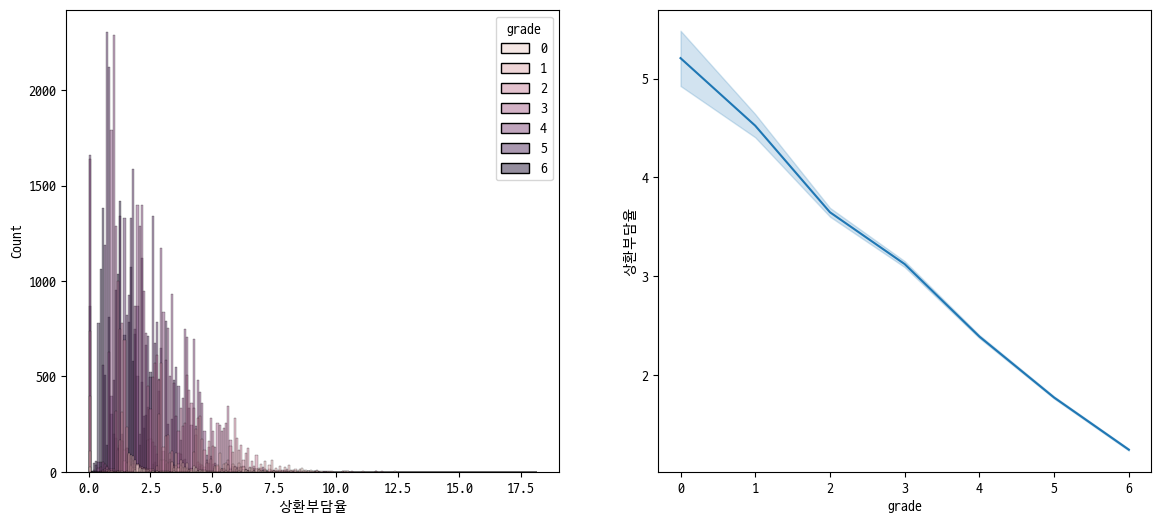

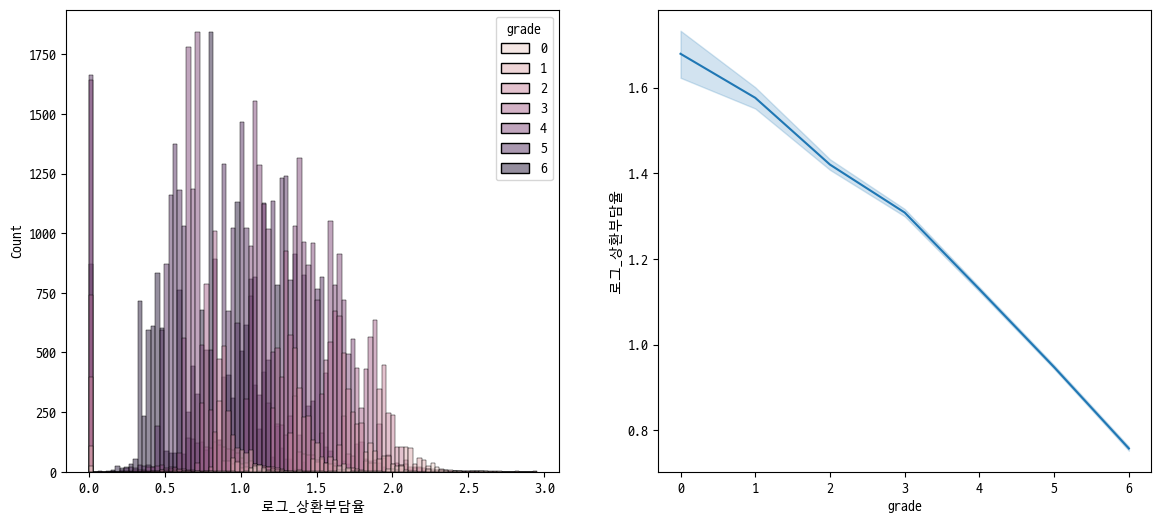

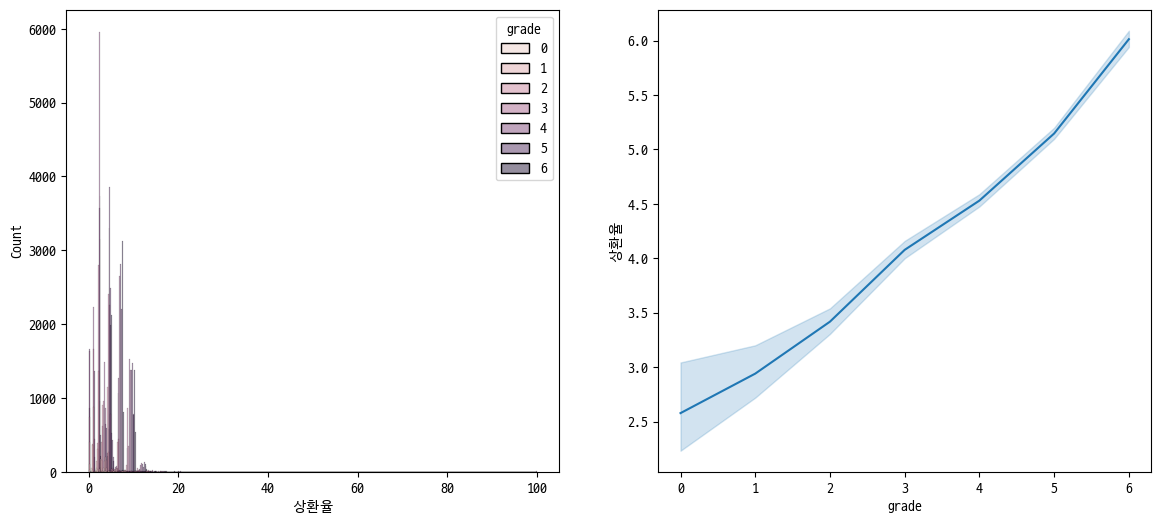

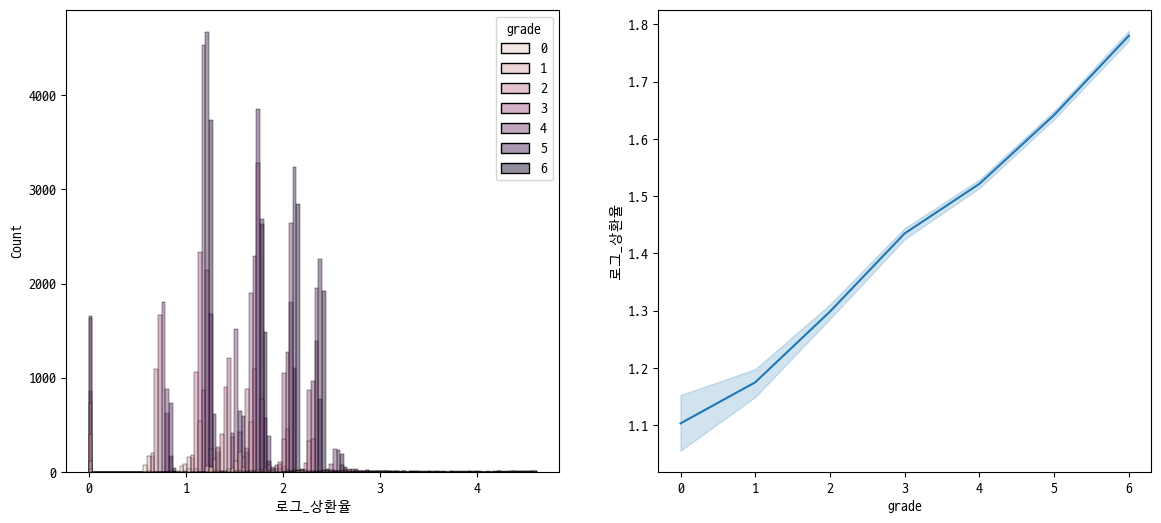

In [72]:
eda_list = ['상환부담율', '로그_상환부담율', '상환율', '로그_상환율']
hue_order = ['6', '5', '4', '3', '2', '1', '0']

for col in eda_list:    
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 6))
    sns.histplot(data=train_df2, x=col, hue='grade', ax=ax[0])
    sns.lineplot(data=train_df2, y=col, x='grade', ax=ax[1])
    plt.show()

## 2. 모델링

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [74]:
def get_score(model_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted') #각 클래스에 대한 F1 스코어를 계산하고, 클래스별 샘플 수에 따라 가중 평균을 계산하여 전체 F1 스코어를 얻음
    print(model_name, ')', 'acc 스코어: ', acc, ',', 'f1 스코어: ', f1)

In [75]:
from sklearn.model_selection import train_test_split

X_features = ['로그_상환부담율', '로그_상환율']

X = train_df2[X_features]
y = train_df2['grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, stratify = y, random_state = 42)

In [76]:
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier(random_state=42)
model_lgb = LGBMClassifier(random_state = 42)

model_rf.fit(X_train, y_train)
model_xgb.fit(X_train, y_train)
model_lgb.fit(X_train, y_train)

y_pred_rf = model_rf.predict(X_test)
y_pred_xgb = model_xgb.predict(X_test)
y_pred_lgb = model_lgb.predict(X_test)

get_score('model_rf', y_test, y_pred_rf)
get_score('model_xgb', y_test, y_pred_xgb)
get_score('model_lgb', y_test, y_pred_xgb)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000612 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 67405, number of used features: 2
[LightGBM] [Info] Start training from score -5.434895
[LightGBM] [Info] Start training from score -3.897369
[LightGBM] [Info] Start training from score -2.572111
[LightGBM] [Info] Start training from score -1.975557
[LightGBM] [Info] Start training from score -1.248802
[LightGBM] [Info] Start training from score -1.206424
[LightGBM] [Info] Start training from score -1.747717
model_rf ) acc 스코어:  0.9494253669343672 , f1 스코어:  0.9499599422653064
model_xgb ) acc 스코어:  0.9392481307117142 , f1 스코어:  0.9396793464152445
model_lgb ) acc 스코어:  0.9392481307117142 , f1 스코어:  0.9396793464152445


메모: 상환부담율, 상환율
- model_rf ) acc 스코어:  0.948698421489892 , f1 스코어:  0.9492744138774135
- model_xgb ) acc 스코어:  0.9390404320132927 , f1 스코어:  0.9394647991678058
- model_lgb ) acc 스코어:  0.9390404320132927 , f1 스코어:  0.9394647991678058

## 3. 선형회귀

In [77]:
from sklearn.linear_model import LinearRegression

X = train_df2[['로그_상환부담율', '로그_상환율']]
y = train_df2[['grade']]

model = LinearRegression()
model.fit(X, y)

lr_coef = model.coef_
lr_intercept = model.intercept_

w1 = lr_coef[0][0].round(2)
w2 = lr_coef[0][1].round(2)
interc_rnd = lr_intercept[0].round(2)

print(w1, w2, interc_rnd)
print("lr 신용 점수 =", "상환부담율 *", w1, "+", "상환율 *", w2, "+", interc_rnd)

-2.58 1.72 4.34
lr 신용 점수 = 상환부담율 * -2.58 + 상환율 * 1.72 + 4.34


In [78]:
train_df2['신용점수'] = (train_df2['로그_상환부담율'] * (-2.58)) + (train_df2['로그_상환율'] * 1.72) + 4.34
train_df2.head()

,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급,상환부담율,상환율,로그_상환부담율,로그_상환율,grade,신용점수
0,12480000,36,6.0,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C,0.000000,0.000000,0.000000,0.000000,4,4.340000
1,14400000,60,10.0,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B,1.625417,2.594250,0.965240,1.279335,5,4.050139
2,12000000,36,5.0,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A,1.266200,7.738700,0.818104,2.167761,6,5.957840
3,14400000,36,8.0,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C,1.063250,2.262667,0.724282,1.182545,4,4.505329
4,18000000,60,NaN,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B,0.827533,1.269667,0.602967,0.819633,5,4.194113


## 4. 스케일링(0~1000)

In [84]:
from sklearn.preprocessing import MinMaxScaler

# 범위(0~1000) 설정
mnmx_scaler = MinMaxScaler(feature_range=(0, 1000))  

train_df2['최종신용점수'] = mnmx_scaler.fit_transform(train_df2[['신용점수']])
train_df2.describe()

,대출금액,대출기간,근로기간,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,상환부담율,상환율,로그_상환부담율,로그_상환율,grade,신용점수,최종신용점수
count,9.629300e+04,96293.000000,90623.000000,9.629300e+04,96293.000000,96293.000000,96293.000000,9.629300e+04,9.629300e+04,96293.000000,96293.000000,96293.000000,96293.000000,96293.000000,96293.000000,96293.000000,96293.000000,96293.000000
mean,1.830414e+07,43.929548,6.007791,9.392770e+07,19.275952,25.304882,0.345664,8.225099e+05,4.282318e+05,54.381149,0.005805,2.256616,4.784138,1.068651,1.564607,4.277871,4.274004,377.468618
std,1.032903e+07,11.288611,3.728511,9.956877e+07,9.624810,12.088616,0.919108,1.027749e+06,4.402120e+05,1414.776554,0.079967,1.554905,4.785389,0.482246,0.627441,1.270967,1.015325,80.145526
min,1.200000e+06,36.000000,0.000000,1.440000e+06,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.507965,0.000000
25%,1.020000e+07,36.000000,2.000000,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000,1.084133,2.349312,0.734353,1.208755,4.000000,3.630623,326.682843
50%,1.680000e+07,36.000000,6.000000,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870160e+05,0.000000,0.000000,1.949167,4.367333,1.081523,1.680331,4.000000,4.340000,382.678057
75%,2.400000e+07,60.000000,10.000000,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702280e+05,0.000000,0.000000,3.098750,6.964000,1.410682,2.074931,5.000000,4.988783,433.890290
max,4.200000e+07,60.000000,10.000000,1.080000e+10,1092.520000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000,18.146637,100.000000,2.952127,4.615121,6.000000,12.160556,1000.000000


## 5. 최종신용점수

<Axes: xlabel='grade', ylabel='최종신용점수'>

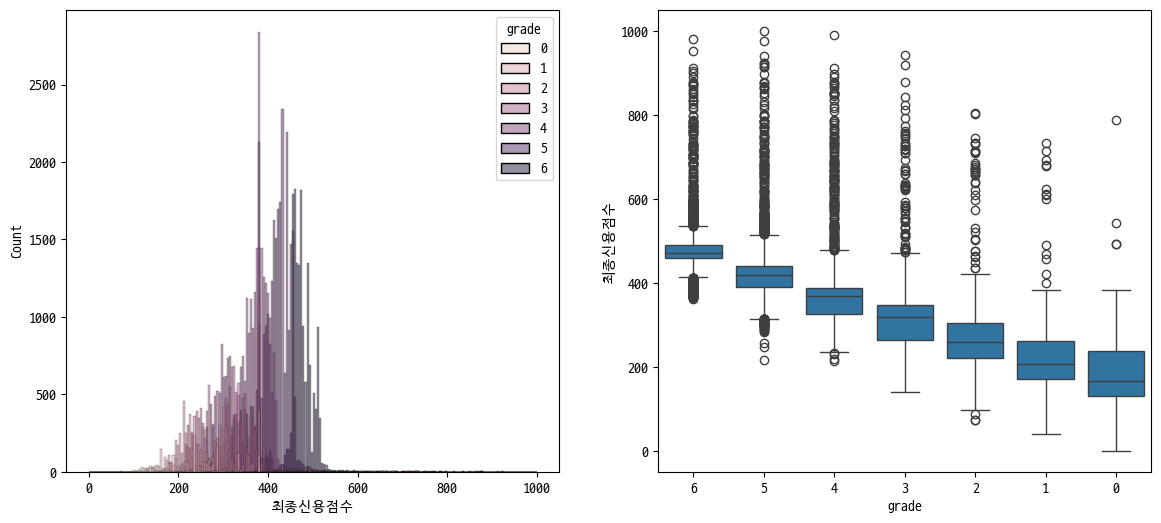

In [86]:
hue_order = ['6', '5', '4', '3', '2', '1', '0']

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(14, 6))
sns.histplot(data=train_df2, x='최종신용점수', hue='grade', ax=ax[0])
sns.boxplot(data=train_df2, y='최종신용점수', x='grade', order=hue_order, ax=ax[1])